# CNN - Fashion MNIST 

github.com/zalandoresearch

> _Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits._

Więcej informacji - https://github.com/zalandoresearch/fashion-mnist

# ----------------------------------------------------------

# Obróbka danych

## Obrazki z jednego pliku płaskiego `csv` zostaną przekonwertowane do oddzielnych plików w formacie `png`

### Import modułów

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv 
import os
from PIL import Image

### Załadowanie danych MNIST Fashion

In [3]:
path = '../../dane/fashionmnist/'

with open(path + 'fashion-mnist_test.csv') as csvfile:
    clothing_reader = csv.reader(csvfile)
    next(clothing_reader)
    clothing_list=list(clothing_reader)

In [4]:
len(clothing_list)

10000

In [5]:
len(clothing_list[0])

785

In [6]:
clothing_list[0]

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '9',
 '8',
 '0',
 '0',
 '34',
 '29',
 '7',
 '0',
 '11',
 '24',
 '0',
 '0',
 '3',
 '3',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '44',
 '88',
 '99',
 '122',
 '123',
 '80',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '3',
 '46',
 '174',
 '249',
 '67',
 '0',
 '94',
 '210',
 '61',
 '14',
 '212',
 '157',
 '37',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '2',
 '0',
 '23',
 '168',
 '206',
 '242',
 '239',
 '238',
 '214',
 '125',
 '61',
 '113',
 '74',
 '133',
 '236',
 '238',
 '236',
 '203',
 '184',
 '20',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '175',
 '245',
 '223',
 '207',
 '205',
 '206',
 '216',
 '255',
 '237',
 '251',
 '232',
 '223',
 '212',
 '200',
 '205',
 '216',
 '249',
 '173',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '7',
 '0',
 '53',
 '225',
 '201',
 '197',
 '2

In [7]:
clothing_list = [[int(j) for j in i] for i in clothing_list]

### Create seperate class list

In [8]:
classes = [[] for i in range(10)]
classes

[[], [], [], [], [], [], [], [], [], []]

In [9]:
for i in clothing_list:
    for j in range(10):
        if i[0] == j:
            classes[j].append(i[1:])
            break
        else:
            continue

In [10]:
len(classes)

10

### Konwersja list do nympy.array

In [11]:
for cl in classes:
    for idx, image in enumerate(cl):
        cl[idx] = np.reshape((np.array(image)),(28,28))

### Pokaż przykładowy obrazkek dla każdej z klas
    Słownik klas
    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot

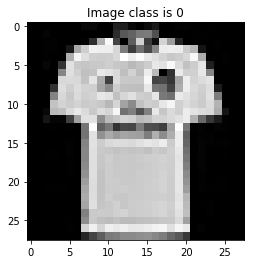

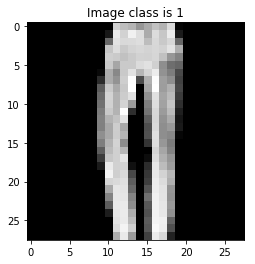

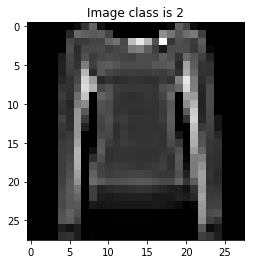

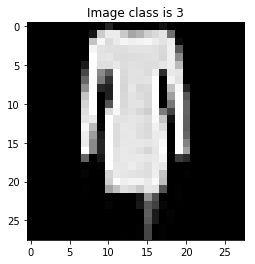

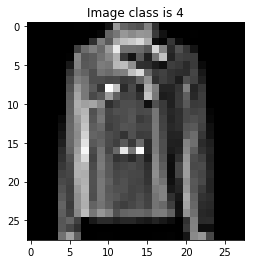

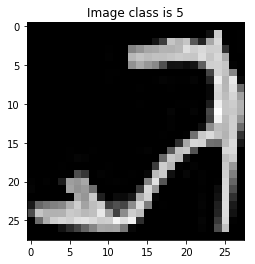

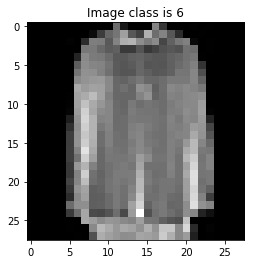

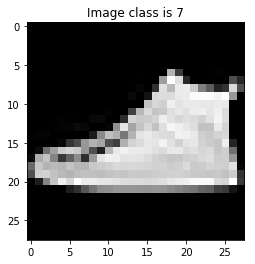

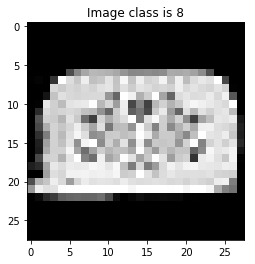

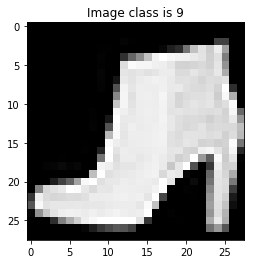

In [12]:
for i,cl in enumerate(classes):
    plt.title('Image class is {}'.format(i))
    plt.imshow(cl[0], cmap='gray')
    plt.show()

### Zapisz każdy obrazek do odowiadającej mu klasy katalogu

In [13]:
for idx,cl in enumerate(classes):
    os.makedirs(path + 'mnist_fashion_test_png/class{}'.format(idx))
    for num, image in enumerate(cl):
        im = Image.fromarray(image.astype('uint8'))
        im = im.convert('L')
        im.save(path + 'mnist_fashion_test_png/class{idx}/img{num}.png'.format(idx=idx,num=num), 'PNG')

FileExistsError: [Errno 17] File exists: '../../dane/fashionmnist/mnist_fashion_test_png/class0'

### Koniec obróbki danych

### --------------------------------------------

## Funkcja pomocnicza do wyświetlania wielu obrazków na raz

In [31]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_imgs(cas_table, class_list=range(10), images_per_class=2, figsize=(20,20), query_condition=None, font_size=12):
    """Function for plotting image data from a CASTable object"""
    
    class_description = {'class0':'T-shirt/top', 'class1':'Trouser', 'class2':'Pullover', 'class3':'Dress', 'class4':'Coat',
                     'class5':'Sandal', 'class6':'Shirt', 'class7':'Sneaker', 'class8':'Bag', 'class9':'Ankle boot'}
    
    img_list=[]
    lbl_list=[]
    prd_list=[]
    arr_list=[]
    
    if len(class_list) < images_per_class:
        fig, axes = plt.subplots(nrows=len(class_list), ncols=images_per_class, figsize=figsize)
        
    else:
        fig, axes = plt.subplots(nrows=images_per_class, ncols=len(class_list), figsize=figsize)

    for i in class_list:
        a = cas_table.groupby(['_label_']).get_group(['class'+str(i)]).query(query_condition)
        b = a.sample(images_per_class).fetch(to=images_per_class)
        lbl_list.append((b['Fetch']['_label_']))
        img_list.append((b['Fetch']['_image_']))

        if query_condition != None:
            prd_list.append((b['Fetch']['_DL_PredName_']))
    
    
    img_df=pd.concat(img_list)
    lbl_df=pd.concat(lbl_list)
    
    if query_condition != None:
        prd_df=pd.concat(prd_list)
    

    for j in img_df:
        c=np.fromstring(j,np.uint8)
        c=c.reshape((28,28))
        arr_list.append(c)
    
    for x,ax in enumerate(axes.flat):
        ax.imshow(arr_list[x],cmap='gray')
        ax.set_title('True label: {}'.format(class_description[lbl_df.iloc[x]]))
        ax.title.set_fontsize(font_size)
        ax.xaxis.label.set_fontsize(font_size)

        if query_condition != None:
            ax.set_xlabel('Pred label: {}'.format(class_description[prd_df.iloc[x]]))
            
        ax.set_xticks([])
        ax.set_yticks([])
        plt.tight_layout()

# Głęboka sieć neuronowa LeNET

### Zaimportowanie modułów i utworzenie sesji CAS

In [14]:
%matplotlib inline
from collections import OrderedDict
import swat
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

sns.set()

In [16]:
# Start CAS session
s = swat.CAS('localhost', 5570)
s.loadActionSet('image')
s.loadActionSet('deepLearn')
s.loadActionSet('sampling')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'sampling'.


[actionset]

 'sampling'

+ Elapsed: 0.00107s, user: 1.1e-05s, sys: 0.00105s, mem: 0.2mb

In [17]:
class_dict = OrderedDict([
    ('class0','T-shirt/top'),
    ('class1','Trouser'),
    ('class2','Pullover'),
    ('class3','Dress'),
    ('class4','Coat'),
    ('class5','Sandal'),
    ('class6','Shirt'),
    ('class7','Sneaker'),
    ('class8','Bag'),
    ('class9','Ankle boot')
])

### Załadowanie danych do CAS

In [21]:
imagesPath = '/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/'

Załadowanie obrazków do trenowania

In [22]:
s.image.loadimages(
    casOut=dict(name='TRAIN', replace=True),
    path= imagesPath + 'mnist_fashion_train_png',
    recurse=True, labelLevels=1,
    decode=True
)

NOTE: Loaded 59907 images from /home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mnist_fashion_train_png into Cloud Analytic Services table TRAIN.


+ Elapsed: 12.5s, user: 2.95s, sys: 2.06s, mem: 20.5mb

Załadowanie obrazków testowych

In [23]:
s.image.loadImages(
    casOut=dict(name='TEST', replace=True),
    path= imagesPath + 'mnist_fashion_test_png',
    recurse=True, labelLevels=1,
    decode=True
)

NOTE: Loaded 9982 images from /home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mnist_fashion_test_png into Cloud Analytic Services table TEST.


+ Elapsed: 2.12s, user: 0.55s, sys: 0.33s, mem: 12.5mb

In [24]:
s.image.summarizeImages(imageTable='TRAIN')['Summary']

NOTE: Table TRAIN contains decompressed images.
NOTE: 59907 out of 59907 images were scanned and results were saved to the summary table.


,Column,png,minWidth,maxWidth,minHeight,maxHeight,meanWidth,meanHeight,mean1stChannel,min1stChannel,max1stChannel,mean2ndChannel,min2ndChannel,max2ndChannel,mean3rdChannel,min3rdChannel,max3rdChannel
0,_image_,59907.0,28.0,28.0,28.0,28.0,28.0,28.0,73.002725,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Podział obrazków do trenowania na część trenującą i walidacyjną za pomocą losowania warstwowego po klasach. Podział 80/20
- Training - PartInd = 0 
- Validation - PartInd = 1

In [25]:
s.stratified(
    display='STRAFreq',
    output=dict(casOut=dict(name='TRAIN', replace=True), copyVars='ALL'),
    sampPct=20, partInd=True, seed=10,
    table='TRAIN',
    outputTables=dict(names='STRAFreq', replace=True)
)

NOTE: Using SEED=10 for sampling.
NOTE: The CAS table 'STRAFreq' in caslib 'CASUSER(fl0r3k)' has 1 rows and 3 columns.


,ByGrpID,NObs,NSamp
0,0,59907,11981


##### Utworznie uchwytów do tabel TRAIN i TEST

In [26]:
trainTbl = s.CASTable('TRAIN')
testTbl= s.CASTable('TEST')
trainTbl.shuffle(casout=dict(name=trainTbl,replace=True), table=trainTbl)
testTbl.shuffle(casout=dict(name=testTbl,replace=True), table=testTbl)

[caslib]

 'CASUSER(fl0r3k)'

[tableName]

 'TEST'

[casTable]

 CASTable('TEST', caslib='CASUSER(fl0r3k)')

+ Elapsed: 0.0184s, user: 0.0154s, sys: 0.00295s, mem: 22.5mb

### Statystyki agregujące dla tabel oraz sprawdzenie poprawności partycjonowania

##### Powinniśmy zobaczyć dodatkową kolumnę `_PartInd_`

In [27]:
trainTbl.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,NFL,NFD
0,_dimension_,,1,int64,8,12,0,0
1,_resolution_,,2,varbinary,16,16,0,0
2,_imageFormat_,,3,int64,8,12,0,0
3,_image_,,4,varbinary,784,784,0,0
4,_size_,,5,int64,8,12,0,0
5,_path_,,6,varchar,86,86,0,0
6,_label_,,7,varchar,6,6,0,0
7,_type_,,8,char,3,3,0,0
8,_id_,,9,int64,8,12,0,0
9,_PartInd_,Partition Indicator,10,double,8,12,0,0


##### Tabela częstości dla wartości klumny `_PartInd_`

In [28]:
trainTbl.freq(inputs='_PartInd_')

,Column,NumVar,FmtVar,Level,Frequency
0,_PartInd_,0.0,0,1,47926.0
1,_PartInd_,1.0,1,2,11981.0


##### A tak wyglądają dane obrazka :)

In [29]:
trainTbl.head()

,_dimension_,_resolution_,_imageFormat_,_image_,_size_,_path_,_label_,_type_,_id_,_PartInd_
0,2,b'\x1c\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,784,/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mn...,class4,png,16214,0.0
1,2,b'\x1c\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,784,/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mn...,class8,png,40331,0.0
2,2,b'\x1c\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00T\xd2\xa...,784,/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mn...,class1,png,34993,0.0
3,2,b'\x1c\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,784,/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mn...,class4,png,16118,0.0
4,2,b'\x1c\x00\x00\x00\x00\x00\x00\x00\x1c\x00\x00...,0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,784,/home/fl0r3k/SGH/sas-viya/dane/fashionmnist/mn...,class8,png,37180,0.0


### Plot sample images from each class
    Class Description
    0   T-shirt/top
    1   Trouser
    2   Pullover
    3   Dress
    4   Coat
    5   Sandal
    6   Shirt
    7   Sneaker
    8   Bag
    9   Ankle boot

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


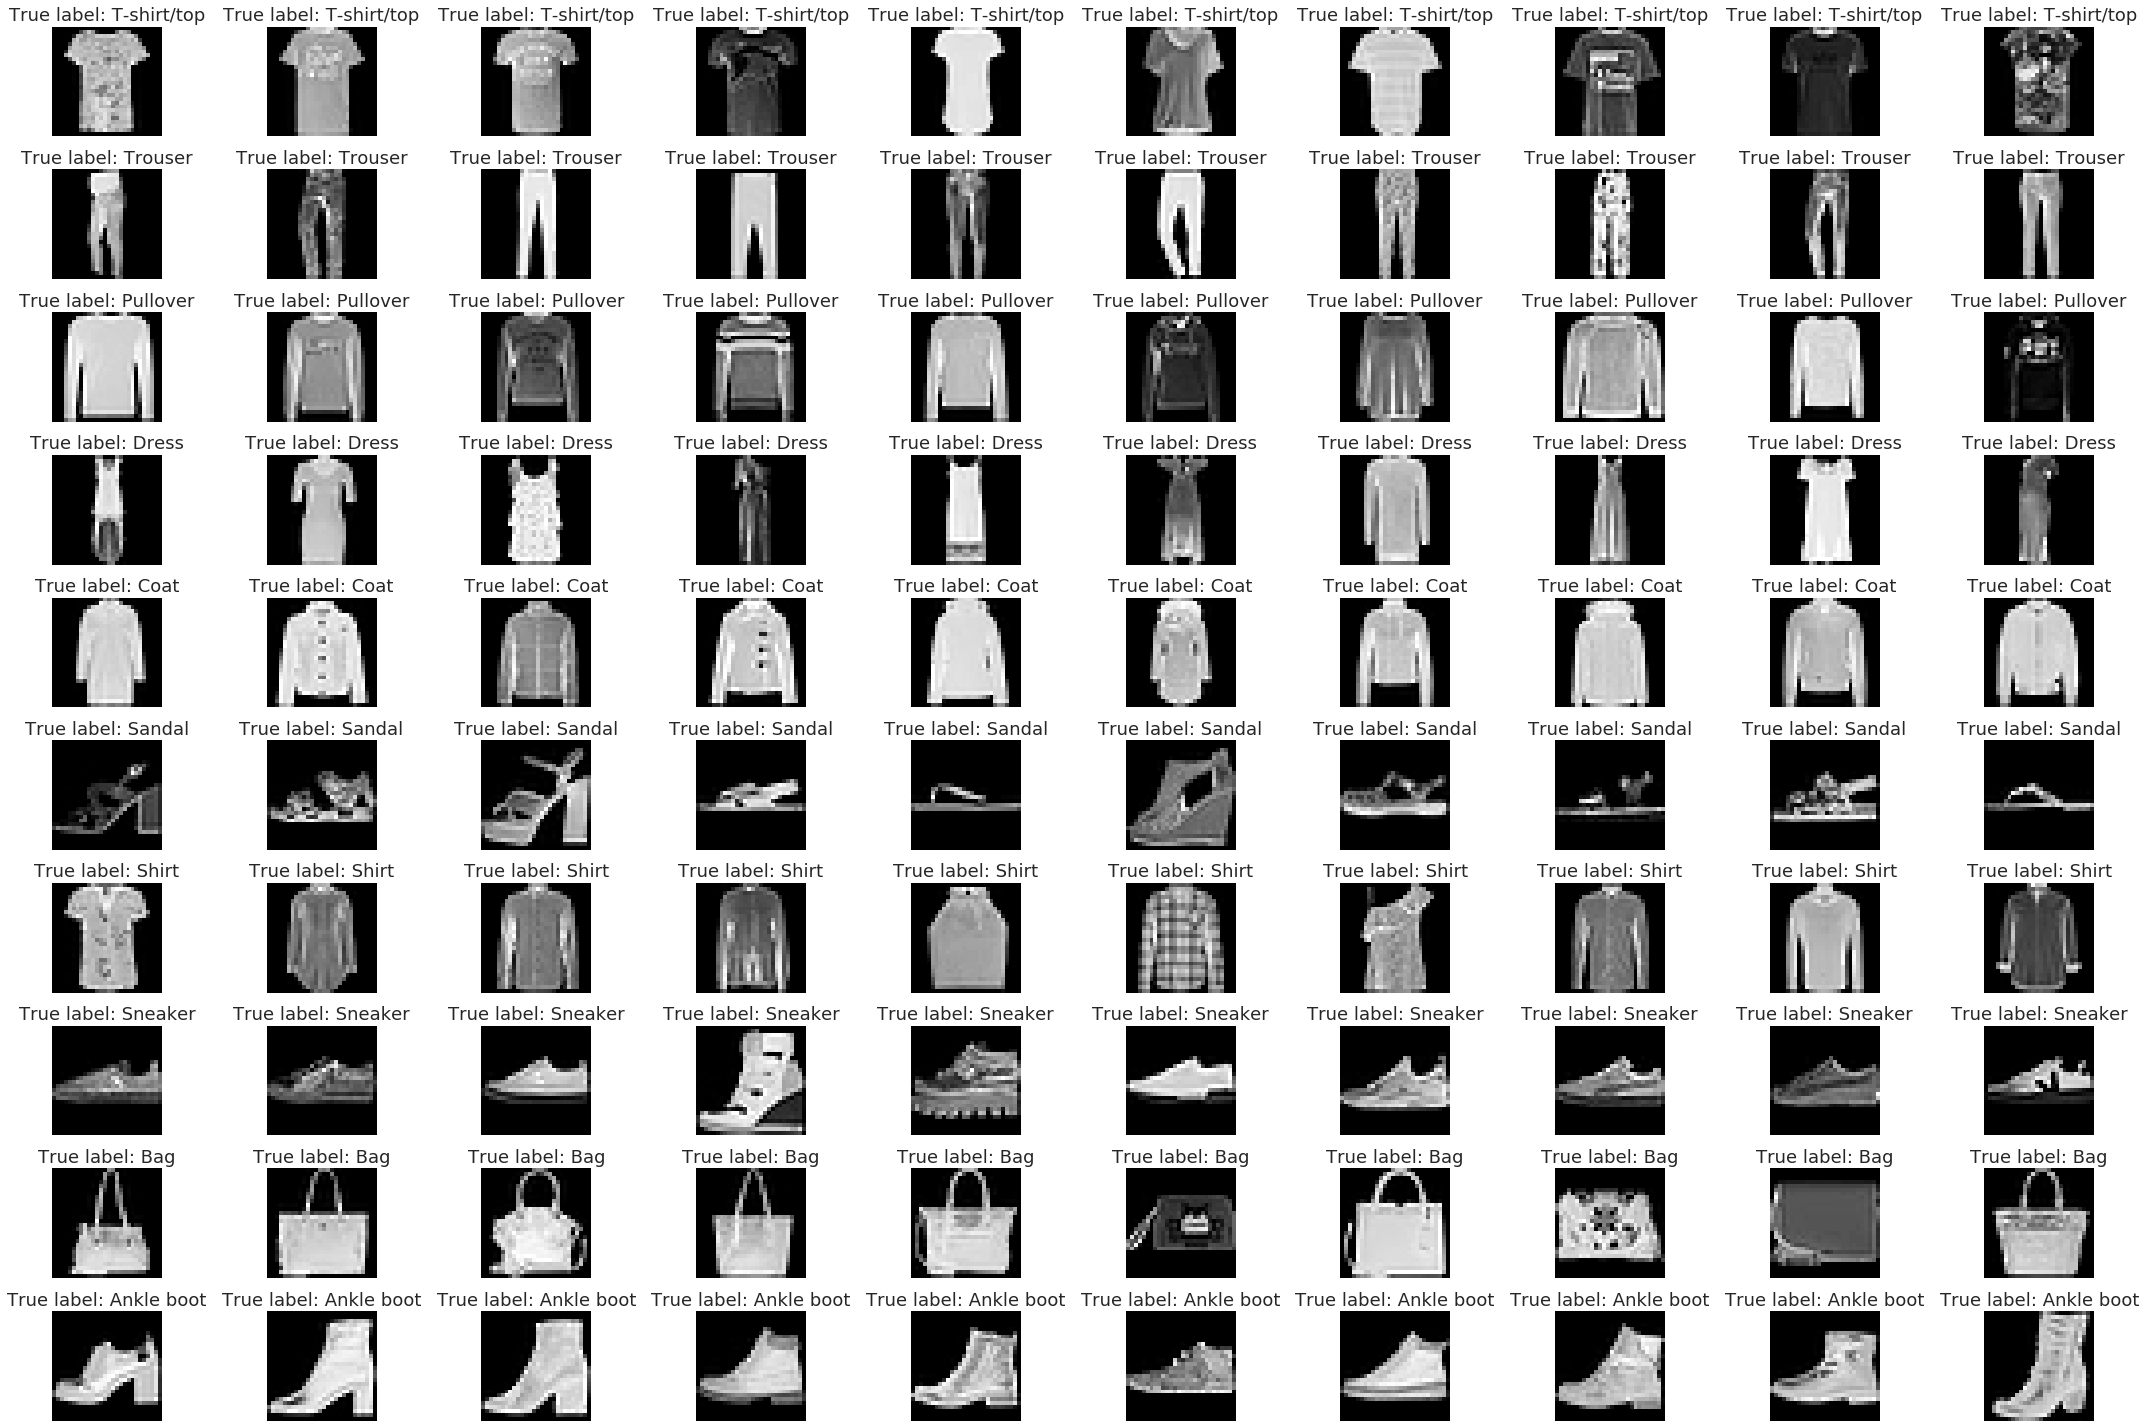

In [32]:
plot_imgs(trainTbl, images_per_class=10, figsize=(30,20), font_size=18)

# Projektujemy sięć neuronową

# CNN - Convolution Neural Network

# Konwolucyjna Sieć Neuronowa

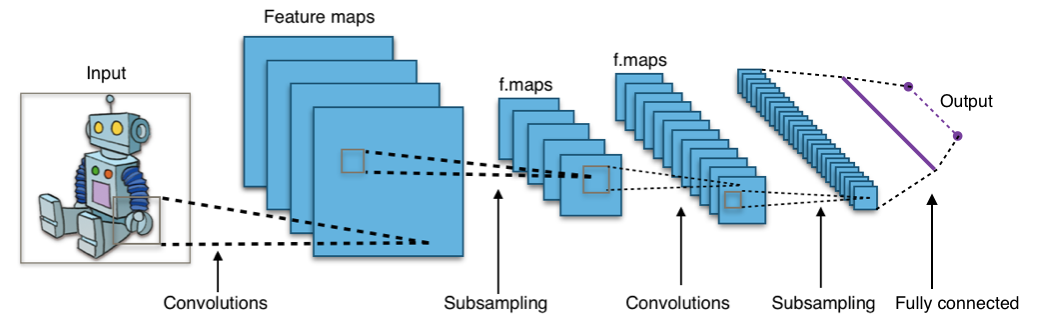

By Aphex34 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=45679374

In [33]:
# Pusty model CNN
s.buildModel(
    model=dict(name='lenet', replace=True),type='CNN'
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,1,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [34]:
# Dodajemy pierwszą warstwę
# To jest warstwa wejściowa, która wczytuje wszystkie piksele obrazka 28x28x1
s.addLayer(
    model='lenet', name='data', replace=True,
    layer=dict(
        type='input',
        nchannels=1,
        width=28,
        height=28,
        scale=0.004,
        std='STD'
    )
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,10,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [35]:
# Dodanie pierwszej warstwy konwolucyjnej
s.addLayer(
    model='lenet', name='conv1', replace=True,
    srcLayers=['data'],
    layer=dict(
        type='convolution',
        act='relu',
        nFilters=32,
        width=5,
        height=5,
        stride=1,
        init='xavier'
    )
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,26,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [36]:
# Pierwsza warstwa Pooling
s.addLayer(
    model='lenet', name='pool1', replace=True, srcLayers=['conv1'],
    layer=dict(
        type='pooling',
        width=2,
        height=2,
        stride=2,
        pool='max'
    ) 
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,35,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [37]:
# Druga warstwa konwolucyjna
s.addLayer(
    model='lenet', name='conv2', replace=True, srcLayers=['pool1'],
    layer=dict(
        type='convolution',
        act='relu',
        nFilters=64,
        width=5,
        height=5,
        stride=1,
        init='xavier'
    )
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,51,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [38]:
# Druga warstwa Pooling
s.addLayer(
    model='lenet', name='pool2', replace=True, srcLayers=['conv2'],
    layer=dict(
        type='pooling',
        width=2,
        height=2,
        stride=2,
        pool='max'
    )
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,60,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [39]:
# Warstwa wpełni połączona - "fully connected layer"
s.addLayer(
    model='lenet', name='fc1', replace=True, srcLayers=['pool2'],
    layer=dict(
        type='fullconnect',
        n=1024,
        act='relu',
        init='xavier',
        dropout = 0.4
    )
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,71,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [40]:
# Warstwa wyjściowa z funkcją softmax
s.addLayer(
    model='lenet', name='outlayer', replace=True, srcLayers=['fc1'],
    layer=dict(
        type='output',
        n=10,
        act='softmax',
        init='xavier')
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(fl0r3k),lenet,83,5,"CASTable('lenet', caslib='CASUSER(fl0r3k)')"


In [41]:
s.modelInfo(model='lenet')

,Descr,Value
0,Model Name,lenet
1,Model Type,Convolutional Neural Network
2,Number of Layers,7
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,2
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,1


### Trenowanie LeNet

In [42]:
trainTbl.shuffle(casout=dict(name=trainTbl,replace=True), table=trainTbl)
testTbl.shuffle(casout=dict(name=testTbl,replace=True), table=testTbl)

[caslib]

 'CASUSER(fl0r3k)'

[tableName]

 'TEST'

[casTable]

 CASTable('TEST', caslib='CASUSER(fl0r3k)')

+ Elapsed: 0.0177s, user: 0.0115s, sys: 0.00614s, mem: 22.5mb

In [43]:
lenet = s.dltrain(
    model='lenet',
    table=dict(name=trainTbl, where='_PartInd_ = 0.0'),
    validTable=dict(name='TRAIN', where='_PartInd_ = 1.0'),
    seed=54321,
    nthreads=1,
    gpu=dict(devices={0}),
    inputs=['_image_'],
    target='_label_',
    modelWeights=dict( name='LeNet_Weights', replace=True),
    optimizer=dict(
        mode=dict(type='synchronous'),
        miniBatchSize=64,
        algorithm=dict( method='momentum', learningRate = 1e-2),
        maxEpochs=50,
        loglevel=1
    )
)
lenet

NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 3274634.
NOTE:  The approximate memory cost is 40.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       1.45 (s).
NOTE:  The total number of threads on each worker is 1.
NOTE:  The total number of minibatch size per thread on each worker is 64.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 64.
NOTE:  The optimization reached the maximum number of epochs.
NOTE:  The total time is     356.48 (s).


,Descr,Value
0,Model Name,lenet
1,Model Type,Convolutional Neural Network
2,Number of Layers,7
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,2
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,1
8,Number of Weight Parameters,3273504
9,Number of Bias Parameters,1130


### Skoring danych testowych

In [44]:
s.dlscore(
    model='lenet',
    initWeights='LeNet_weights',
    table=testTbl,
    copyVars={'_label_','_image_'},
    layerImageType='jpg',
    layerOut=dict(name='layerOut', replace=True),
    casout=dict(name='LeNet_scored', replace=True)
)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          9982
 1  Number of Observations Used          9982
 2  Misclassification Error (%)      7.022641
 3                   Loss Error      0.377337

[OutputCasTables]

             casLib          Name  Rows  Columns  \
 0  CASUSER(fl0r3k)      layerOut  9982      197   
 1  CASUSER(fl0r3k)  LeNet_scored  9982       15   
 
                                             casTable  
 0     CASTable('layerOut', caslib='CASUSER(fl0r3k)')  
 1  CASTable('LeNet_scored', caslib='CASUSER(fl0r3...  

+ Elapsed: 14.9s, user: 64.6s, sys: 3.42s, mem: 113mb

### Które klasy były zaklasyfikowane niepprawnie

##### Tablica częstości

In [45]:
s.table.columnInfo('LeNet_scored')

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,_image_,,1,varbinary,784,784,,0,0
1,_label_,,2,varchar,6,6,,0,0
2,_DL_P0_,class8,3,double,8,12,BEST,12,0
3,_DL_P1_,class7,4,double,8,12,BEST,12,0
4,_DL_P2_,class9,5,double,8,12,BEST,12,0
5,_DL_P3_,class4,6,double,8,12,BEST,12,0
6,_DL_P4_,class3,7,double,8,12,BEST,12,0
7,_DL_P5_,class6,8,double,8,12,BEST,12,0
8,_DL_P6_,class5,9,double,8,12,BEST,12,0
9,_DL_P7_,class0,10,double,8,12,BEST,12,0


In [46]:
cmr = s.crosstab(table='LeNet_scored', row='_label_', col='_DL_PredName_')
cmr['Crosstab']
cmr

,_label_,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,class0,913.0,0.0,12.0,9.0,2.0,1.0,57.0,1.0,5.0,0.0
1,class1,1.0,977.0,3.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0
2,class2,17.0,0.0,887.0,12.0,45.0,0.0,38.0,0.0,1.0,0.0
3,class3,18.0,6.0,5.0,927.0,20.0,0.0,21.0,0.0,2.0,0.0
4,class4,1.0,0.0,24.0,26.0,911.0,0.0,37.0,0.0,1.0,0.0
5,class5,0.0,0.0,0.0,0.0,0.0,969.0,0.0,20.0,1.0,7.0
6,class6,109.0,1.0,44.0,23.0,40.0,0.0,779.0,0.0,4.0,0.0
7,class7,0.0,0.0,0.0,0.0,0.0,3.0,0.0,957.0,0.0,33.0
8,class8,2.0,1.0,1.0,2.0,3.0,0.0,3.0,2.0,986.0,0.0
9,class9,0.0,0.0,0.0,0.0,0.0,4.0,0.0,21.0,0.0,975.0


##### Plot frequency of misclassifications for each class

In [47]:
c=cmr['Crosstab'].values
c=c[:,1:].astype('float')
c

array([[913.,   0.,  12.,   9.,   2.,   1.,  57.,   1.,   5.,   0.],
       [  1., 977.,   3.,  10.,   1.,   0.,   1.,   0.,   0.,   0.],
       [ 17.,   0., 887.,  12.,  45.,   0.,  38.,   0.,   1.,   0.],
       [ 18.,   6.,   5., 927.,  20.,   0.,  21.,   0.,   2.,   0.],
       [  1.,   0.,  24.,  26., 911.,   0.,  37.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0., 969.,   0.,  20.,   1.,   7.],
       [109.,   1.,  44.,  23.,  40.,   0., 779.,   0.,   4.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   3.,   0., 957.,   0.,  33.],
       [  2.,   1.,   1.,   2.,   3.,   0.,   3.,   2., 986.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   4.,   0.,  21.,   0., 975.]])

##### Plot a confusion matrix

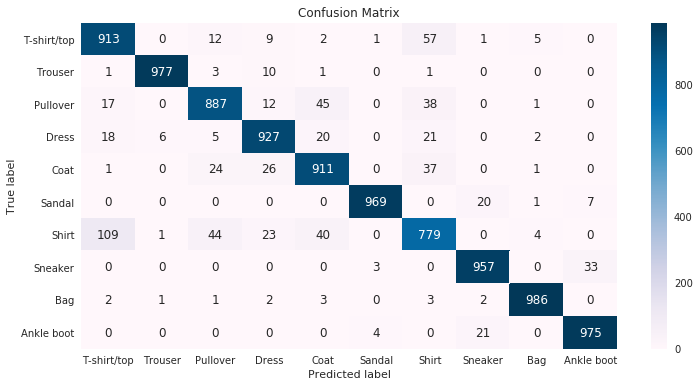

In [48]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(c,annot=True, fmt="g", cmap='PuBu',
                 yticklabels=class_dict.values(), xticklabels=class_dict.values())
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


##### A few correct predictions at random

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


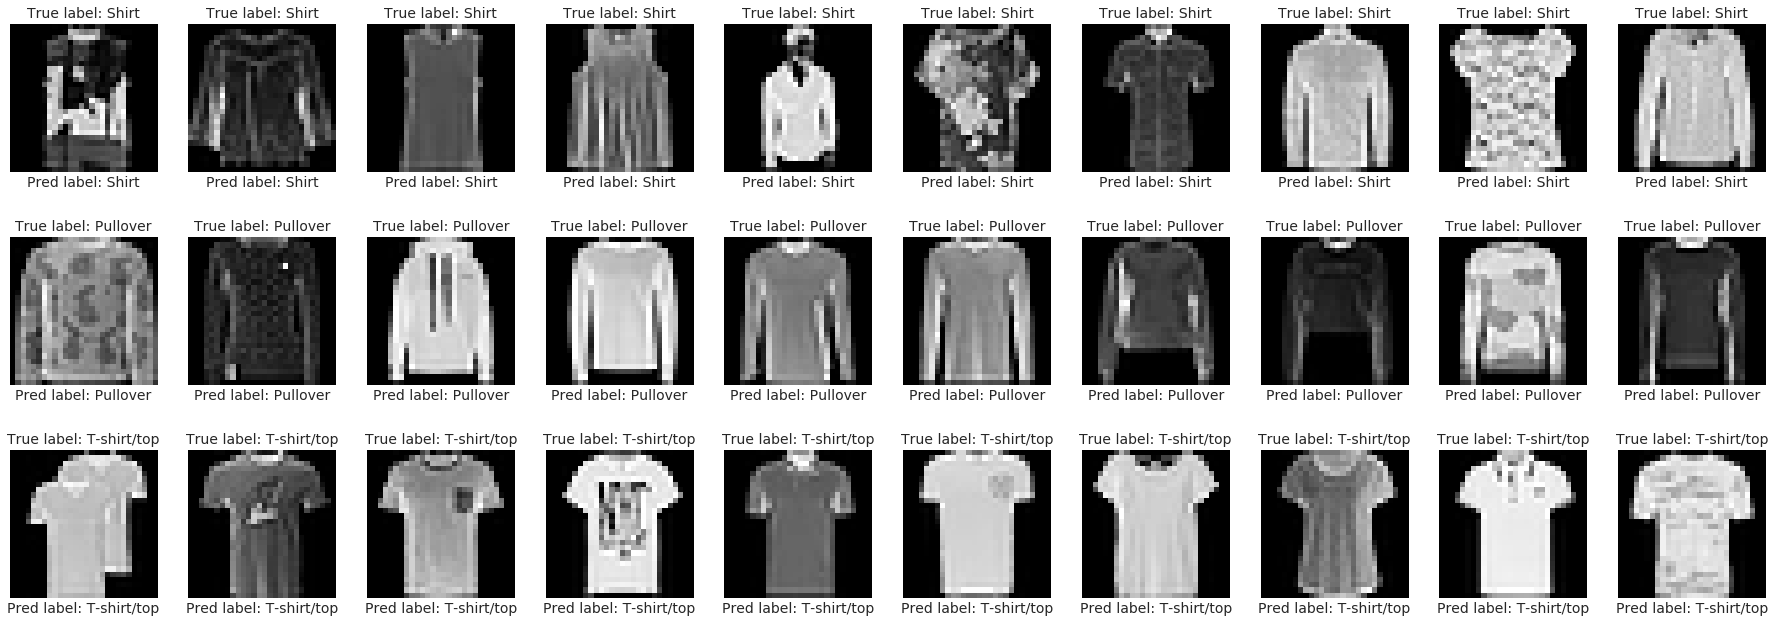

In [49]:
plot_imgs(s.CASTable('lenet_scored'), class_list=[6,2,0], query_condition='_label_ = _DL_PredName_',
          images_per_class=10, figsize=(25,10), font_size=14)

##### A few incorrect predictions at random - classes 6, 2, 0

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


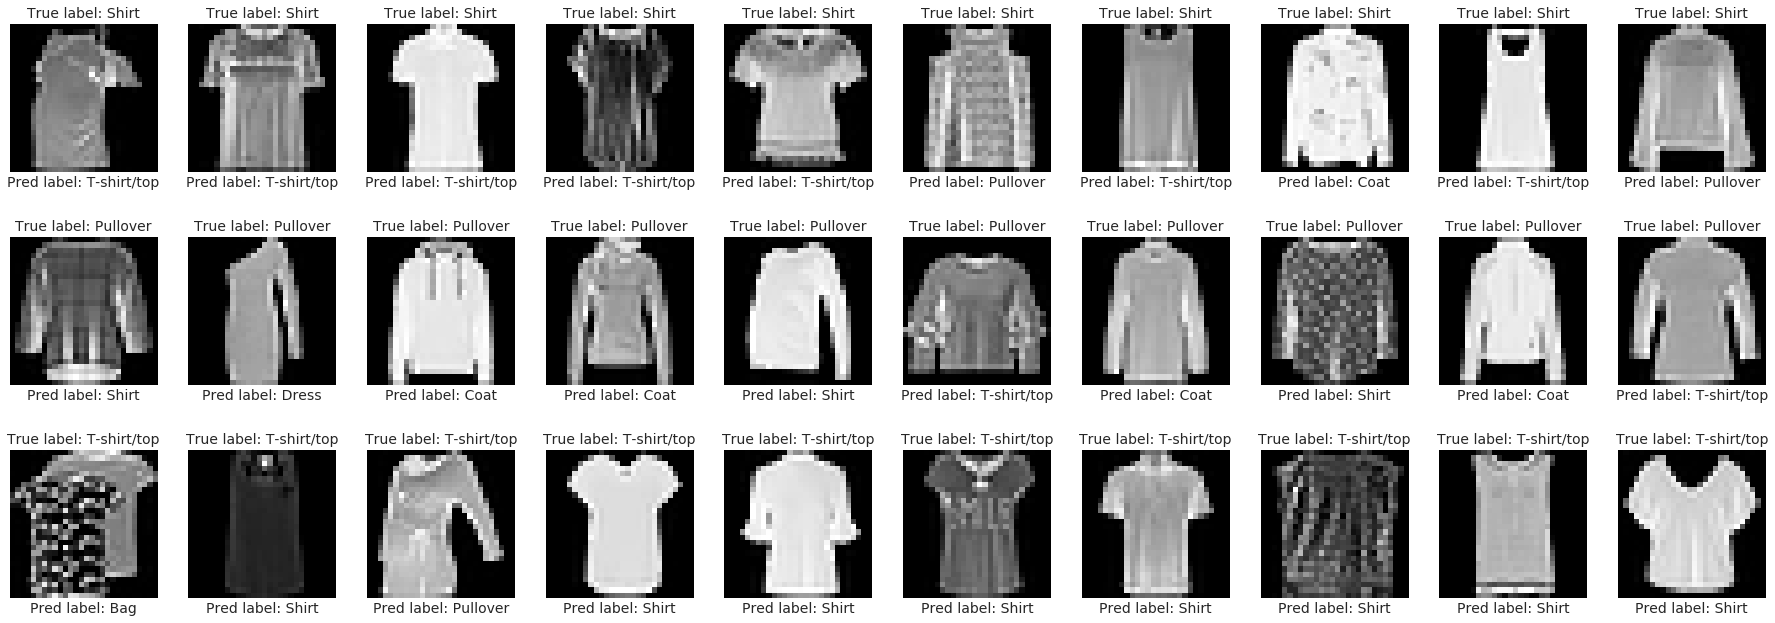

In [50]:
plot_imgs(s.CASTable('lenet_scored'), class_list=[6,2,0], query_condition='_label_ ^= _DL_PredName_',
          images_per_class=10, figsize=(25,10), font_size=14)

#####   The most correct predictions for class6 images

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


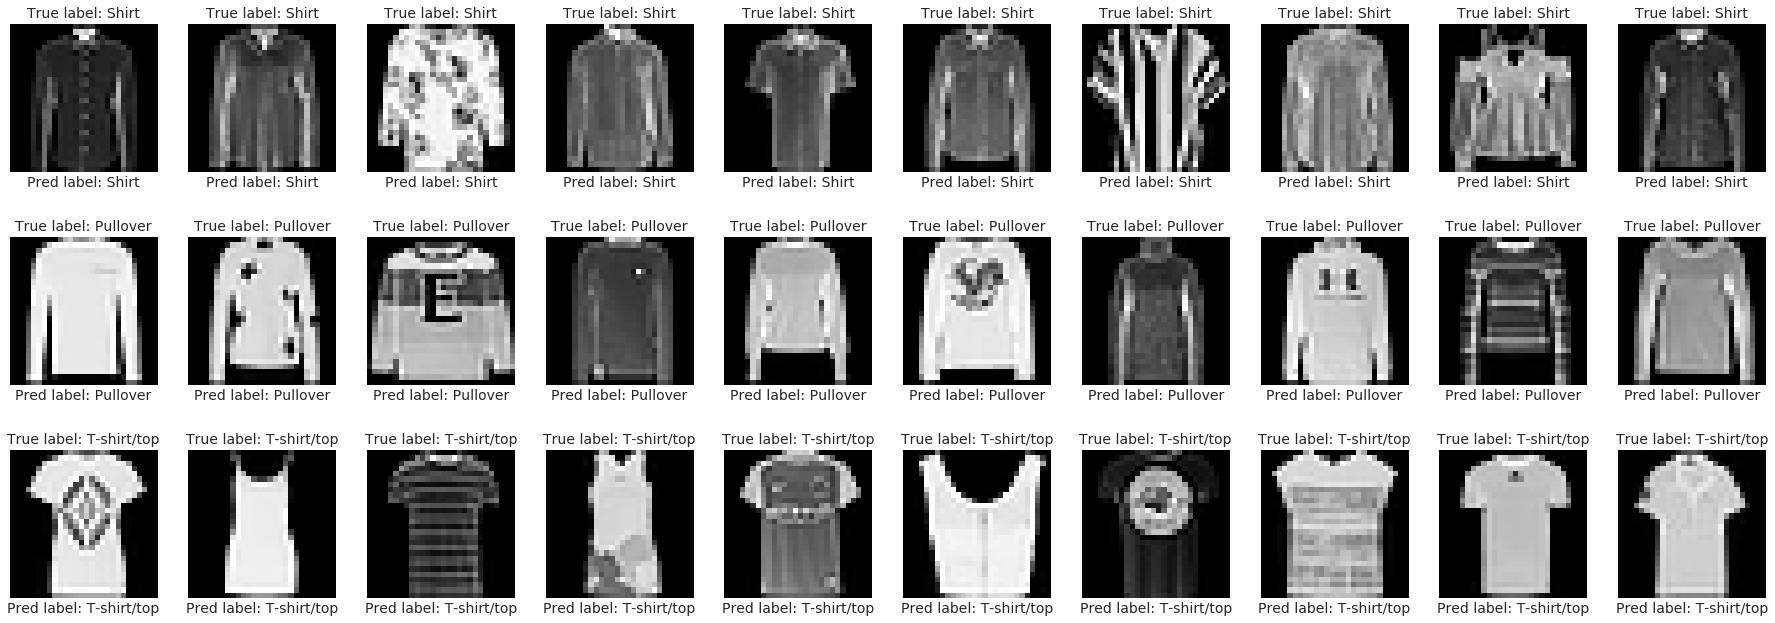

In [51]:
plot_imgs(s.CASTable('lenet_scored'),class_list=[6,2,0], query_condition='_label_ = _DL_PredName_ and _DL_PredP_ > 0.9',
          images_per_class=10, figsize=(25,10),font_size=14)

##### The most incorrect predictions for class6 images

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


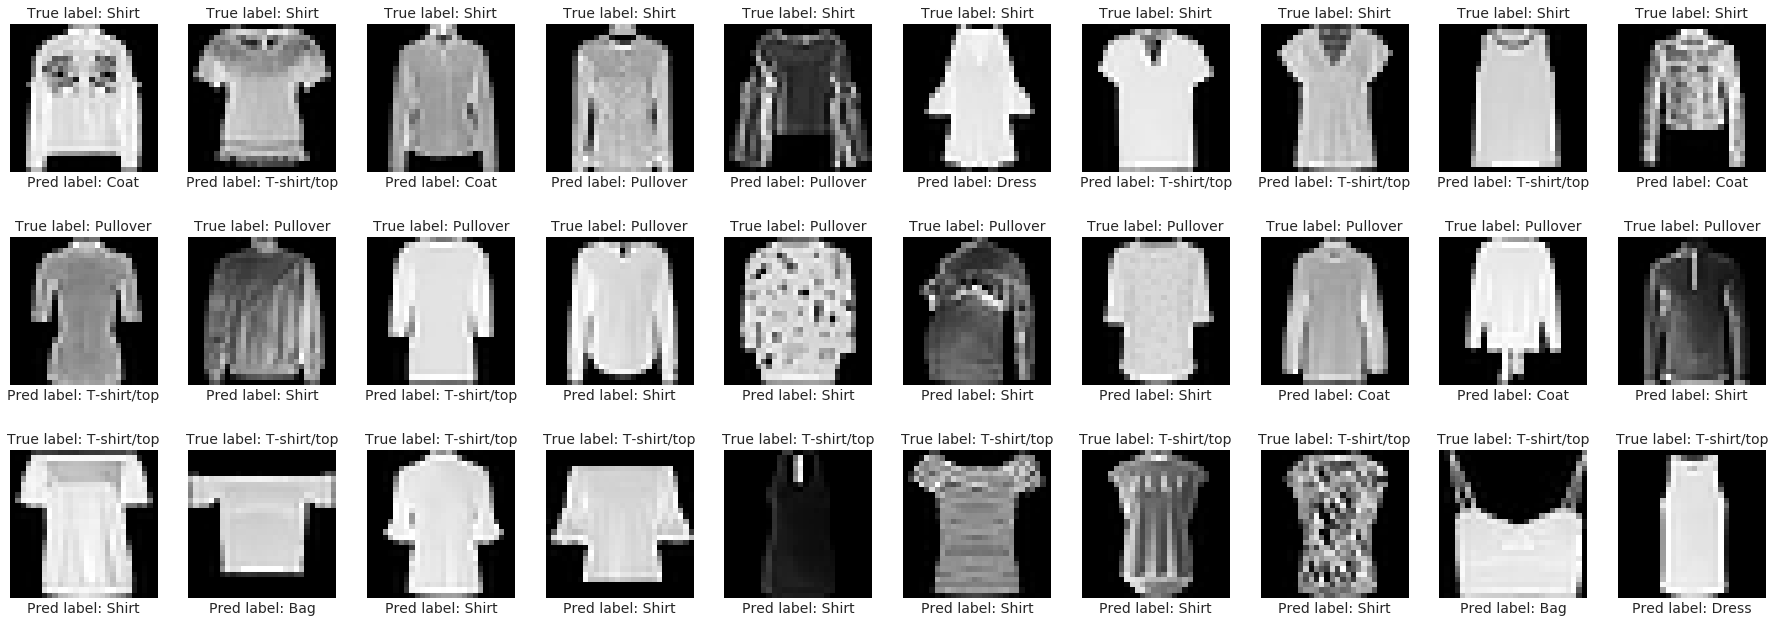

In [52]:
plot_imgs(s.CASTable('lenet_scored'),class_list=[6,2,0], query_condition='_label_ ^= _DL_PredName_ and _DL_PredP_ > 0.9',
          images_per_class=10, figsize=(25,10),font_size=14)

### Conv walk through

In [53]:
layeroutTbl = s.CASTable('layerout',replace=True)
l_out = layeroutTbl.fetch()['Fetch']

NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.


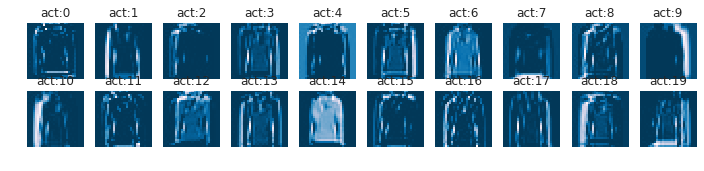

In [54]:
fig=plt.figure(figsize=(12, 6))
for i in range(20):
    w=np.asarray(layeroutTbl.fetchimages(image='_LayerAct_1_IMG_{}_'.format(i))['Images'].iloc[0][0])
    b=fig.add_subplot(5,10,i+1)
    plt.imshow(w, cmap='PuBu_r')
    plt.title('act:{}'.format(i))
    plt.axis('off')

NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT contains compressed images.
NOTE: Table LAYEROUT

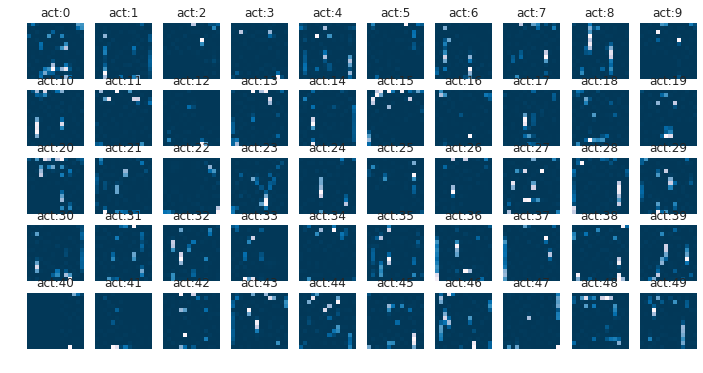

In [55]:
fig=plt.figure(figsize=(12, 6))
for i in range(50):
    w=np.asarray(layeroutTbl.fetchimages(image='_LayerAct_3_IMG_{}_'.format(i))['Images'].iloc[0][0])
    b=fig.add_subplot(5,10,i+1)
    plt.imshow(w, cmap='PuBu_r')
    plt.title('act:{}'.format(i))
    plt.axis('off')

In [56]:
s.endsession()

+ Elapsed: 0.000126s, sys: 0.000118s, mem: 0.195mb